# MRI Brain tumor classification with TensorFlow

Using Kaggle's dataset available in: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection

## Importing the dependencies

In [1]:
import os
import random
import glob
import shutil
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Getting the data ready

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Creating the test/train folders

DATA_PATH = 'brain_tumor_dataset'
os.chdir(DATA_PATH)

# Unzip the dataset
zip_ref = zipfile.ZipFile('archive.zip')
zip_ref.extractall()
zip_ref.close()

YES_SIZE = len(os.listdir('yes'))
NO_SIZE = len(os.listdir('no'))
        
    
TRAIN_PROP = 0.8
TEST_PROP = 0.2

if os.path.isdir('train/yes') is False:
    os.makedirs('train/yes')
    os.makedirs('train/no')
    os.makedirs('test/yes')
    os.makedirs('test/no')

### Moving a random sample of 80% of all "Yes" class to train folder

In [4]:
for file in random.sample(os.listdir('yes'),
                          int(TRAIN_PROP * YES_SIZE)):
    
    filedir = os.path.join('yes', file)
    dest = os.path.join('train/yes', file)
    
    shutil.move(filedir, dest)
    
    print(f'Moving {filedir} to ===> {dest}')

Moving yes\Y254.jpg to ===> train/yes\Y254.jpg
Moving yes\Y108.jpg to ===> train/yes\Y108.jpg
Moving yes\Y70.jpg to ===> train/yes\Y70.jpg
Moving yes\Y54.jpg to ===> train/yes\Y54.jpg
Moving yes\Y75.JPG to ===> train/yes\Y75.JPG
Moving yes\Y153.jpg to ===> train/yes\Y153.jpg
Moving yes\Y3.jpg to ===> train/yes\Y3.jpg
Moving yes\Y31.jpg to ===> train/yes\Y31.jpg
Moving yes\Y10.jpg to ===> train/yes\Y10.jpg
Moving yes\Y181.jpg to ===> train/yes\Y181.jpg
Moving yes\Y186.jpg to ===> train/yes\Y186.jpg
Moving yes\Y82.jpg to ===> train/yes\Y82.jpg
Moving yes\Y58.JPG to ===> train/yes\Y58.JPG
Moving yes\Y17.jpg to ===> train/yes\Y17.jpg
Moving yes\Y113.JPG to ===> train/yes\Y113.JPG
Moving yes\Y92.png to ===> train/yes\Y92.png
Moving yes\Y40.JPG to ===> train/yes\Y40.JPG
Moving yes\Y164.JPG to ===> train/yes\Y164.JPG
Moving yes\Y52.jpg to ===> train/yes\Y52.jpg
Moving yes\Y49.JPG to ===> train/yes\Y49.JPG
Moving yes\Y81.jpg to ===> train/yes\Y81.jpg
Moving yes\Y56.jpg to ===> train/yes\Y56.jp

### Moving the remaining 20% of all "Yes" class to test folder

In [5]:
for file in os.listdir('yes'):
    filedir = os.path.join('yes', file)
    dest = os.path.join('test\yes', file)
    
    shutil.move(filedir, dest)
    print(f'Moving {filedir} to ===> {dest}')

Moving yes\Y104.jpg to ===> test\yes\Y104.jpg
Moving yes\Y107.jpg to ===> test\yes\Y107.jpg
Moving yes\Y114.JPG to ===> test\yes\Y114.JPG
Moving yes\Y116.JPG to ===> test\yes\Y116.JPG
Moving yes\Y148.JPG to ===> test\yes\Y148.JPG
Moving yes\Y159.JPG to ===> test\yes\Y159.JPG
Moving yes\Y163.JPG to ===> test\yes\Y163.JPG
Moving yes\Y165.JPG to ===> test\yes\Y165.JPG
Moving yes\Y18.JPG to ===> test\yes\Y18.JPG
Moving yes\Y180.jpg to ===> test\yes\Y180.jpg
Moving yes\Y185.jpg to ===> test\yes\Y185.jpg
Moving yes\Y193.JPG to ===> test\yes\Y193.JPG
Moving yes\Y20.jpg to ===> test\yes\Y20.jpg
Moving yes\Y244.JPG to ===> test\yes\Y244.JPG
Moving yes\Y245.jpg to ===> test\yes\Y245.jpg
Moving yes\Y246.JPG to ===> test\yes\Y246.JPG
Moving yes\Y25.jpg to ===> test\yes\Y25.jpg
Moving yes\Y253.JPG to ===> test\yes\Y253.JPG
Moving yes\Y255.JPG to ===> test\yes\Y255.JPG
Moving yes\Y26.jpg to ===> test\yes\Y26.jpg
Moving yes\Y38.jpg to ===> test\yes\Y38.jpg
Moving yes\Y42.jpg to ===> test\yes\Y42.jpg


### Moving a random sample of 80% of all "No" class to train folder

In [6]:
for file in random.sample(os.listdir('no'),
                          int(TRAIN_PROP * NO_SIZE)):
    
    filedir = f"{os.path.join('no', file)}"
    dest = os.path.join('train/no', file)
    
    shutil.move(filedir, dest)
    
    print(f'Moving {filedir} to ===> {dest}')

Moving no\no 4.jpg to ===> train/no\no 4.jpg
Moving no\4 no.jpg to ===> train/no\4 no.jpg
Moving no\18 no.jpg to ===> train/no\18 no.jpg
Moving no\13 no.jpg to ===> train/no\13 no.jpg
Moving no\14 no.jpg to ===> train/no\14 no.jpg
Moving no\35 no.jpg to ===> train/no\35 no.jpg
Moving no\45 no.jpg to ===> train/no\45 no.jpg
Moving no\21 no.jpg to ===> train/no\21 no.jpg
Moving no\N17.jpg to ===> train/no\N17.jpg
Moving no\36 no.jpg to ===> train/no\36 no.jpg
Moving no\1 no.jpeg to ===> train/no\1 no.jpeg
Moving no\no 9.png to ===> train/no\no 9.png
Moving no\no 923.jpg to ===> train/no\no 923.jpg
Moving no\22 no.jpg to ===> train/no\22 no.jpg
Moving no\33 no.jpg to ===> train/no\33 no.jpg
Moving no\no 91.jpeg to ===> train/no\no 91.jpeg
Moving no\no 89.jpg to ===> train/no\no 89.jpg
Moving no\No12.jpg to ===> train/no\No12.jpg
Moving no\12 no.jpg to ===> train/no\12 no.jpg
Moving no\38 no.jpg to ===> train/no\38 no.jpg
Moving no\41 no.jpg to ===> train/no\41 no.jpg
Moving no\40 no.jpg t

### Moving the remaining 20% of all "No" class to test folder

In [7]:
for file in os.listdir('no'):
    filedir = os.path.join('no', file)
    dest = os.path.join('test/no', file)
    
    shutil.move(filedir, dest)
    print(f'Moving {filedir} to ===> {dest}')

Moving no\10 no.jpg to ===> test/no\10 no.jpg
Moving no\28 no.jpg to ===> test/no\28 no.jpg
Moving no\29 no.jpg to ===> test/no\29 no.jpg
Moving no\42 no.jpg to ===> test/no\42 no.jpg
Moving no\46 no.jpg to ===> test/no\46 no.jpg
Moving no\47 no.jpg to ===> test/no\47 no.jpg
Moving no\49 no.jpg to ===> test/no\49 no.jpg
Moving no\5 no.jpg to ===> test/no\5 no.jpg
Moving no\N11.jpg to ===> test/no\N11.jpg
Moving no\N3.jpg to ===> test/no\N3.jpg
Moving no\N6.jpg to ===> test/no\N6.jpg
Moving no\no 2.jpg to ===> test/no\no 2.jpg
Moving no\no 3.jpg to ===> test/no\no 3.jpg
Moving no\no 8.jpg to ===> test/no\no 8.jpg
Moving no\no 94.jpg to ===> test/no\no 94.jpg
Moving no\no 97.jpg to ===> test/no\no 97.jpg
Moving no\No13.jpg to ===> test/no\No13.jpg
Moving no\No15.jpg to ===> test/no\No15.jpg
Moving no\No18.jpg to ===> test/no\No18.jpg
Moving no\No22.jpg to ===> test/no\No22.jpg


## Preparing the data

In [8]:
train_path = 'train'
test_path = 'test'

In [9]:
# Standardizing the data
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.) 

In [10]:
# Loading the data and turn it into batches for training/testing
BATCH_SIZE = 10

train_data = train_datagen.flow_from_directory(directory=train_path, 
                                              target_size=(224, 224),
                                              class_mode='binary',
                                              batch_size=10) # small dataset

test_data = test_datagen.flow_from_directory(directory=test_path,
                                            target_size=(224, 224),
                                            class_mode='binary',
                                            batch_size=10,
                                            shuffle=False) 
                                            # to generate Confusion Matrix


Found 202 images belonging to 2 classes.
Found 51 images belonging to 2 classes.


In [11]:
assert train_data.n == int(YES_SIZE * TRAIN_PROP) + int(NO_SIZE * TRAIN_PROP)

In [12]:
# Getting a sample batch
imgs, labels = train_data.next()

In [13]:
type(labels)

numpy.ndarray

### Visualizing (half) a batch

In [14]:
def plot_images(images, labels):
    fig, axes = plt.subplots(1, 5, figsize=(10, 10))
    
    for img, ax, label in zip(images, axes, labels):
        ax.imshow(img)
        ax.axis('off')
        condition = 'Healthy' if label==0 else 'Has tumor'
        ax.set_title(f'Label: {int(label)} - {condition}')
    
    plt.tight_layout()
    plt.show()

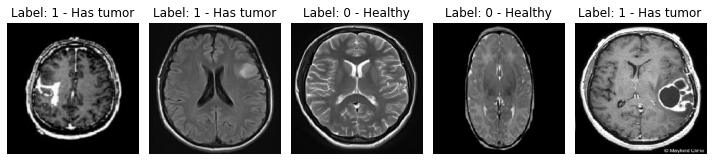

In [15]:
plot_images(imgs, labels)

## Building a Convolutional Neural Network model

Using Keras Sequential API

In [16]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam

In [17]:
tf.random.set_seed(42)

model = Sequential([
    Conv2D(filters=16, 
          kernel_size=3,
          padding='valid',
          activation='relu',
          input_shape=(224, 224, 3)),
    
    Conv2D(filters=32,
          kernel_size=3,
          padding='valid',
          activation='relu'),
    
    MaxPool2D(pool_size=2),
    
    Conv2D(filters=64,
          kernel_size=3,
          padding='valid',
          activation='relu'),
    
    MaxPool2D(pool_size=2),
    
    Flatten(),
    Dense(1, activation='sigmoid')
    
])

In [18]:
model.compile(loss='binary_crossentropy',
             optimizer=Adam(),
             metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0

In [20]:
# Creating a learning rate callback and fitting the model

learning_rate_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-3 * 10 **(epoch/5)
)

learning_rate_history = model.fit(train_data,
                                 epochs=10,
                                 validation_data=test_data,
                                 steps_per_epoch=len(train_data),
                                 validation_steps=len(test_data),
                                 callbacks = [learning_rate_scheduler]
                                 )

Epoch 1/10
21/21 [==============================] - 8s 360ms/step - loss: 0.6890 - accuracy: 0.6139 - val_loss: 0.5395 - val_accuracy: 0.6863 - lr: 0.0010
Epoch 2/10
21/21 [==============================] - 7s 312ms/step - loss: 0.5128 - accuracy: 0.7475 - val_loss: 0.5198 - val_accuracy: 0.8431 - lr: 0.0016
Epoch 3/10
21/21 [==============================] - 7s 343ms/step - loss: 0.4631 - accuracy: 0.7921 - val_loss: 0.3608 - val_accuracy: 0.9216 - lr: 0.0025
Epoch 4/10
21/21 [==============================] - 8s 361ms/step - loss: 0.8049 - accuracy: 0.8366 - val_loss: 0.3962 - val_accuracy: 0.8431 - lr: 0.0040
Epoch 5/10
21/21 [==============================] - 8s 381ms/step - loss: 0.4313 - accuracy: 0.8663 - val_loss: 0.3962 - val_accuracy: 0.8235 - lr: 0.0063
Epoch 6/10
21/21 [==============================] - 8s 359ms/step - loss: 1.0810 - accuracy: 0.7376 - val_loss: 0.4993 - val_accuracy: 0.7647 - lr: 0.0100
Epoch 7/10
21/21 [==============================] - 8s 371ms/step - lo

### Visualizing the Learning Rate vs. Loss curve

Text(0.5, 1.0, "Visualizing the network's behaviour under different lrs")

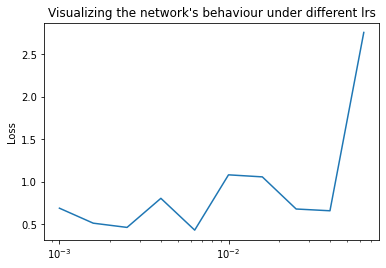

In [21]:
learning_rates = 1e-3 * (10 ** (tf.range(10)/5))
plt.semilogx(learning_rates, learning_rate_history.history['loss'])
plt.ylabel('Loss')
plt.title("Visualizing the network's behaviour under different lrs")

> Ideal: around `learning_rate = 1e-3`

In [22]:
# Reinstantiating the model
model = tf.keras.models.clone_model(model)

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0

In [24]:
model.compile(loss='binary_crossentropy',
             optimizer=Adam(learning_rate=1e-3),
             metrics=['accuracy'])

In [25]:
history = model.fit(train_data,
          validation_data=test_data,
          epochs=10,
          steps_per_epoch = len(train_data),
          validation_steps=len(test_data)
          )

Epoch 1/10
21/21 [==============================] - 8s 368ms/step - loss: 0.9396 - accuracy: 0.6139 - val_loss: 0.6230 - val_accuracy: 0.7255
Epoch 2/10
21/21 [==============================] - 8s 358ms/step - loss: 0.5660 - accuracy: 0.7574 - val_loss: 0.4892 - val_accuracy: 0.8235
Epoch 3/10
21/21 [==============================] - 8s 361ms/step - loss: 0.4468 - accuracy: 0.8069 - val_loss: 0.4824 - val_accuracy: 0.7255
Epoch 4/10
21/21 [==============================] - 8s 358ms/step - loss: 0.3944 - accuracy: 0.8416 - val_loss: 0.3583 - val_accuracy: 0.8431
Epoch 5/10
21/21 [==============================] - 8s 363ms/step - loss: 0.2611 - accuracy: 0.8812 - val_loss: 0.3579 - val_accuracy: 0.8627
Epoch 6/10
21/21 [==============================] - 7s 347ms/step - loss: 0.1397 - accuracy: 0.9505 - val_loss: 0.3249 - val_accuracy: 0.8824
Epoch 7/10
21/21 [==============================] - 7s 325ms/step - loss: 0.0403 - accuracy: 0.9950 - val_loss: 0.3585 - val_accuracy: 0.8627
Epoch 

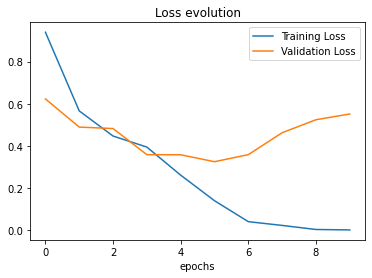

In [26]:
# Visualizing the loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Loss evolution')
plt.xlabel('epochs')
plt.legend()

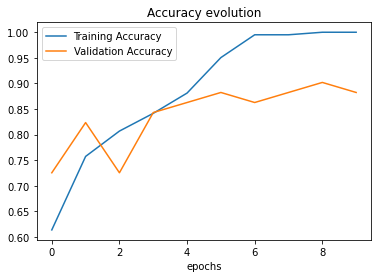

In [27]:
# Visualizing the accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Accuracy evolution')
plt.xlabel('epochs')
plt.legend()

## Predicting example


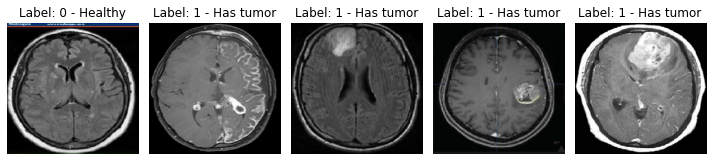

In [28]:
test_images, test_labels = train_data.next()
plot_images(test_images, test_labels)

In [29]:
# Predicting on the full test data
predictions = model.predict(x=test_data)
predictions

6/6 [==============================] - 0s 60ms/step


array([[2.48201601e-02],
       [5.76744020e-01],
       [3.92998598e-04],
       [3.17258497e-07],
       [4.51274902e-01],
       [1.61508840e-04],
       [1.15038233e-06],
       [9.75430850e-03],
       [9.94380116e-01],
       [4.58918450e-08],
       [9.99999702e-01],
       [3.61348179e-06],
       [2.41936300e-06],
       [9.74516792e-04],
       [3.10722953e-06],
       [2.89581891e-04],
       [1.60391524e-03],
       [4.73279329e-07],
       [2.13137810e-06],
       [1.41075355e-11],
       [9.99397695e-01],
       [9.99305069e-01],
       [9.50097024e-01],
       [9.88715947e-01],
       [9.99629080e-01],
       [1.00000000e+00],
       [9.99992013e-01],
       [9.99011993e-01],
       [9.96412218e-01],
       [9.99999046e-01],
       [9.56606328e-01],
       [9.97370601e-01],
       [9.99979258e-01],
       [9.99860108e-01],
       [2.50569671e-01],
       [9.99974191e-01],
       [9.99946713e-01],
       [9.97112393e-01],
       [9.99994278e-01],
       [9.99999762e-01],


All predictions are, in reality, probabilities. 
> Need to convert them into 0 or 1

In [30]:
predictions = tf.round(predictions)
predictions, predictions.shape

(<tf.Tensor: shape=(51, 1), dtype=float32, numpy=
 array([[0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.]], dtype=float32)>,
 TensorShape([51, 1]))

In [31]:
# Correct labels for each test data
test_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

## Plotting confusion matrix

In [32]:
from sklearn.metrics import confusion_matrix
y_true = test_data.classes
y_pred = predictions

confusion_matrix = confusion_matrix(y_true, y_pred)
print(confusion_matrix)

[[17  3]
 [ 3 28]]


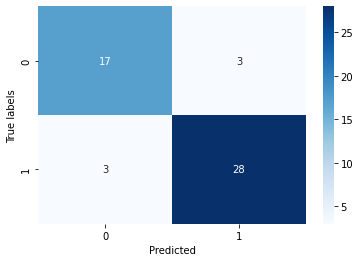

In [33]:
# Making it look better
import seaborn as sns

sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True labels')
plt.show()